# Animal Identification - Model Evaluations

In [1]:
# importing python packages for use

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split

# importing machine learning models to test

import sklearn.ensemble as ske
RFC = ske.RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB as MNB
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.svm import SVC

# importing metrics for model evaluation

from sklearn import metrics

In [2]:
# creating a function for image splitting

def color_extract(picture):
    
    band = Image.Image.split(picture)

    if len(band) >= 3:
        R = band[0]
        G = band[1]
        B = band[2]
    if len(band) == 2:
        R = band[0]
        G = band[1]
        B = 0
    if len(band) == 1:
        R = band[0]
        G = 0
        B = 0
        
    features = [np.mean(R),np.mean(G),np.mean(B),np.std(R),np.std(G),np.std(B)]
    
    return features

In [3]:
# importing the file with the group classification

train = pd.read_excel('Training_ID.xlsx')
train.head()

,Image,Class,ID
0,0,Mammal,1
1,1,Mammal,1
2,2,Mammal,1
3,3,Mammal,1
4,4,Mammal,1


In [4]:
labels = train['ID']
labels.head()

0    1
1    1
2    1
3    1
4    1
Name: ID, dtype: int64

In [5]:
# importing the images and collecting color data from them

raw_data = []

for i in range(train.shape[0]):
    
    image_path = 'Training_Data/'+train['Image'][i].astype('str')+'.jpg'
    img = Image.open(image_path)
    features = color_extract(img)
    raw_data.append(features)

In [6]:
# turning the raw data into a pandas data frame

data = pd.DataFrame(raw_data, columns = ['R_Mean','G_Mean','B_Mean','R_StDev','G_StDev','B_StDev'])
data.shape

(1000, 6)

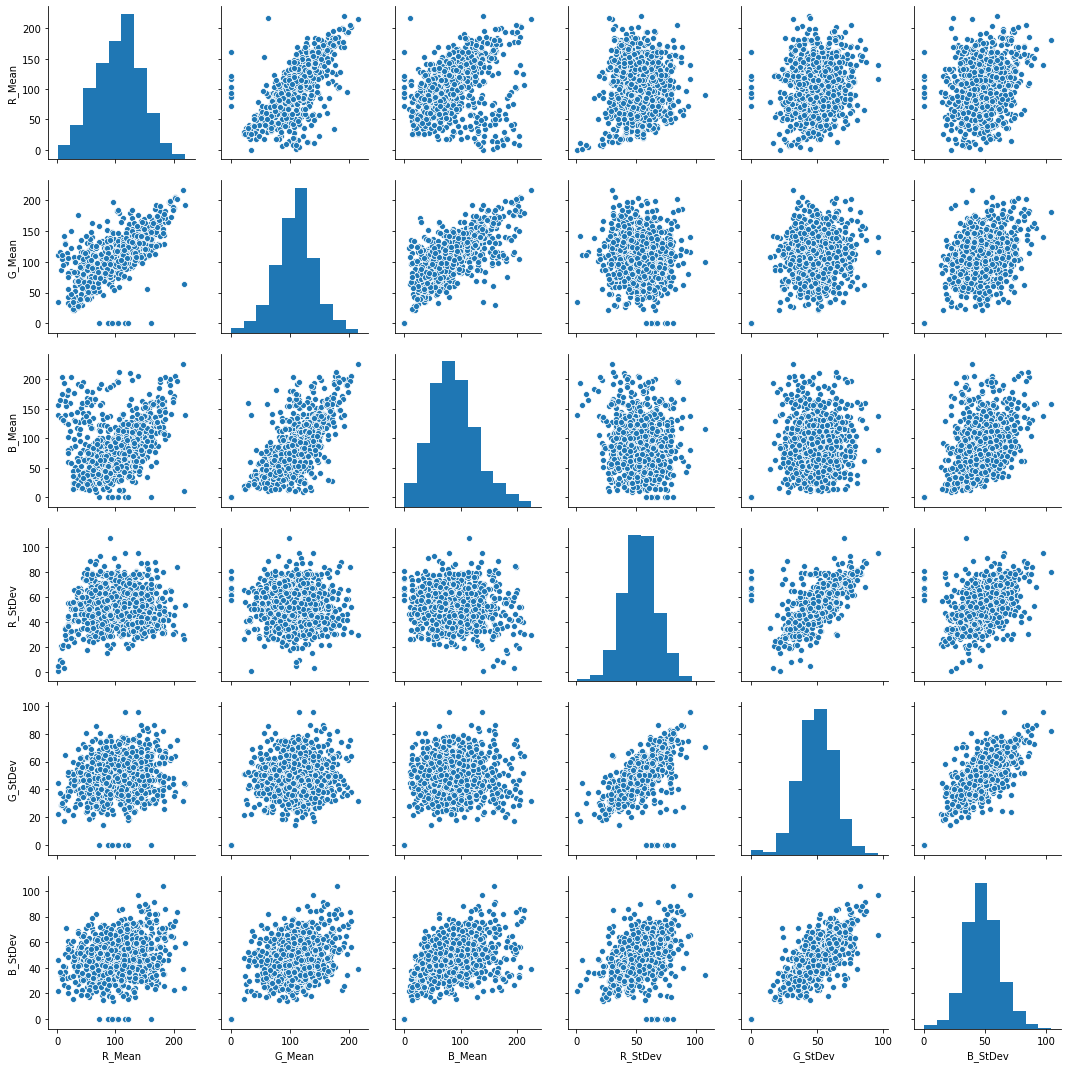

In [7]:
sns.pairplot(data=data)

In [8]:
# creating variables to be used in machine learning model creation

X = data
Y = labels
X.shape

(1000, 6)

In [9]:
Y.shape

(1000,)

In [10]:
# creating training and testing data

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.125,random_state = 0)
X_train.shape

(875, 6)

In [11]:
# Runnning Random Forest on the data set

randomforest = RFC(n_estimators=500,random_state=5)
randomforest.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [12]:
Y_forest_pred = randomforest.predict(X_test)

In [13]:
metrics.accuracy_score(Y_forest_pred,Y_test)

0.456

In [14]:
# Running k-means on the data set

kmeans = KMeans(n_clusters=5,random_state=5)
kmeans.fit(X_train)
Y_kmeans_pred = kmeans.predict(X_test)

In [15]:
Y_kmeans_pred

array([1, 2, 1, 3, 1, 4, 2, 2, 0, 1, 1, 3, 1, 1, 1, 2, 2, 1, 4, 1, 1, 3,
       4, 1, 4, 1, 1, 1, 0, 0, 0, 1, 4, 1, 3, 2, 1, 2, 2, 1, 4, 2, 1, 1,
       1, 1, 1, 4, 1, 2, 1, 1, 2, 0, 1, 3, 2, 1, 2, 4, 2, 1, 1, 4, 3, 1,
       1, 3, 4, 0, 4, 4, 2, 4, 0, 4, 1, 1, 2, 4, 1, 1, 2, 1, 2, 1, 1, 2,
       1, 2, 4, 2, 1, 0, 0, 1, 3, 1, 4, 0, 2, 0, 4, 1, 1, 2, 1, 2, 1, 2,
       1, 3, 0, 0, 1, 1, 2, 4, 3, 2, 2, 0, 2, 1, 1])

In [16]:
metrics.accuracy_score(Y_kmeans_pred,Y_test)

0.232

In [17]:
# Running Multinomial Naive Bayes on the data set

M_naive = MNB()
M_naive.fit(X_train,Y_train)
Y_MNB_pred = M_naive.predict(X_test)

In [18]:
Y_MNB_pred

array([5, 2, 2, 3, 2, 2, 4, 5, 3, 1, 4, 3, 2, 2, 1, 5, 2, 5, 2, 3, 4, 3,
       2, 4, 2, 4, 4, 2, 4, 5, 5, 5, 1, 5, 3, 4, 5, 5, 5, 2, 4, 5, 2, 2,
       2, 5, 2, 2, 2, 4, 2, 2, 4, 4, 5, 3, 4, 2, 5, 2, 5, 2, 4, 2, 3, 1,
       2, 3, 2, 3, 2, 2, 4, 2, 5, 1, 5, 1, 5, 2, 2, 4, 5, 5, 5, 5, 1, 5,
       3, 1, 2, 3, 2, 5, 4, 1, 3, 2, 1, 5, 5, 5, 1, 4, 2, 2, 4, 3, 1, 5,
       2, 3, 4, 3, 2, 1, 3, 2, 3, 2, 3, 5, 5, 2, 5], dtype=int64)

In [19]:
metrics.accuracy_score(Y_MNB_pred,Y_test)

0.432

In [20]:
# Running Multinomial Naive Bayes on the data set

G_naive = GNB()
G_naive.fit(X_train,Y_train)
Y_GNB_pred = G_naive.predict(X_test)

In [21]:
Y_GNB_pred

array([5, 5, 2, 3, 2, 2, 5, 5, 3, 4, 1, 3, 4, 2, 4, 5, 3, 4, 1, 1, 4, 3,
       2, 4, 1, 4, 4, 2, 5, 3, 5, 4, 1, 4, 4, 5, 4, 5, 5, 2, 1, 5, 4, 2,
       2, 4, 4, 2, 2, 4, 2, 2, 5, 5, 2, 3, 5, 2, 5, 2, 4, 2, 4, 1, 3, 4,
       2, 3, 1, 3, 1, 1, 4, 1, 5, 1, 4, 1, 4, 2, 4, 4, 5, 4, 5, 5, 4, 5,
       3, 5, 1, 5, 4, 5, 3, 4, 3, 2, 1, 5, 5, 5, 1, 4, 2, 3, 4, 3, 4, 5,
       2, 3, 5, 5, 4, 4, 3, 2, 3, 2, 5, 5, 5, 4, 5], dtype=int64)

In [22]:
metrics.accuracy_score(Y_MNB_pred,Y_test)

0.432

In [23]:
support_vector = SVC(kernel='linear',random_state=0,gamma='auto')
support_vector.fit(X_train,Y_train)
Y_SVC_pred = support_vector.predict(X_test)

In [24]:
Y_SVC_pred

array([5, 2, 2, 3, 1, 2, 2, 5, 3, 1, 1, 3, 1, 2, 1, 5, 2, 5, 1, 3, 4, 3,
       1, 4, 1, 4, 1, 2, 3, 3, 5, 5, 4, 4, 3, 1, 5, 5, 4, 2, 4, 2, 5, 1,
       1, 5, 1, 1, 1, 4, 1, 2, 2, 3, 5, 3, 5, 1, 5, 1, 5, 1, 4, 1, 3, 4,
       2, 3, 1, 3, 1, 1, 4, 1, 5, 1, 5, 1, 4, 1, 1, 3, 5, 5, 5, 5, 1, 5,
       4, 1, 3, 2, 1, 3, 2, 1, 3, 2, 4, 5, 2, 5, 1, 4, 2, 3, 1, 3, 2, 5,
       2, 3, 3, 3, 2, 1, 3, 1, 3, 2, 3, 5, 5, 1, 5], dtype=int64)

In [25]:
metrics.accuracy_score(Y_SVC_pred,Y_test)

0.352